# Chess Openings Analysis

## Author
James John 

## Purpose
To determine which chess openings are the most popular and explore how opening patterns vary at different rating level. Also analyze winrates and any other quantities that seem to depend on rating level. 

## Motivation 
I want this to serve as a practical intro project on data science 

## Goals
- Import a dataset of chess games
- Clean and prepare the data for analysis
- Analyze openings, winrates, and other quantities 
- Visualize trends across the rating ladder 
- Draw conclusions and discuss insights

## Tools and Libraries 
- Kagglehub
- Pandas
- Matplotlib

## Importing the Dataset
#### The first step is to import our dataset. For this analysis we are using a preset dataset from kaggle. This dataset includes just over 20,000 chess games on Lichess. We can get this dataset by importing kagglehub and extracting the dataset we need

In [109]:
# First make sure kagglehub is installed and then import it
!pip install kagglehub
# Also import all needed libraries 
import kagglehub
import matplotlib.pyplot as plt 
import pandas as pd 
import os

# Create a folder named images so we can save all of our plots to this 
os.makedirs("images", exist_ok=True)

# Also create consistent colors for every plot 
overall_color = 'steelblue'
white_color = 'skyblue'
black_color = 'lightcoral'

# Download latest version
path = kagglehub.dataset_download("datasnaek/chess")

print("Path to dataset files:", path)

# List all files in the dataset folder
os.listdir(path)

Path to dataset files: C:\Users\johnj2241\.cache\kagglehub\datasets\datasnaek\chess\versions\1


['games.csv']

In [110]:
# Open the csv file from where we downloaded the dataset
file_path = os.path.join(path, 'games.csv')
# Store this csv file into our datafile 
df = pd.read_csv(file_path)

#View some of the info about the dataset we currently have 
df.info()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5


## Clean and Prep Data For Analysis 
#### The next step of the project is to prepare the dataset for analysis. This will involve a couple of steps:
- #### Removing all games with missing values
- #### Removing all duplicate games
- #### Removing all unrated games
- #### Removing all short games (<5 moves)
- #### Adding columns for rating difference and average rating

In [111]:
#Remove all rows that dont have an opening name or a listed winner 
before = len(df)
df = df.dropna(subset=['opening_name', 'winner'])
after = len(df)

#See how many rows were removed from the data 
print("Removed",before - after, "rows due to missing data")
print("There are",after, "rows in the data now")

Removed 0 rows due to missing data
There are 20058 rows in the data now


In [112]:
#Check to see if there are any duplicated values and then remove them 
print("Duplicate rows to be removed:", df.duplicated().sum())
df = df.drop_duplicates()

#Show how many games are still in the datset now 
after = len(df)
print("There are",after, "rows in the data now")

Duplicate rows to be removed: 429
There are 19629 rows in the data now


In [113]:
#Remove all unrated games and see how many are being removed
unrated_count = (df['rated'] == False).sum()
print('Number of unrated games removed:', unrated_count)
df = df[df['rated'] == True]

#Show how many games are still in the datset now 
after = len(df)
print("There are",after, "rows in the data now")

Number of unrated games removed: 3812
There are 15817 rows in the data now


In [114]:
#Remove all games that have less than 5 moves
short_games_count = len(df[df['turns'] < 5])
print('Number of games with fewer than 5 turns:',short_games_count)
df = df[df['turns'] >= 5]

#Show how many games are still left in the dataset
print('New total number of games:', len(df))

Number of games with fewer than 5 turns: 241
New total number of games: 15576


In [115]:
#Check to see if any other columns have missing values
df.isna().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

## Data Analysis

#### The next step is to analyze some of the data. The easiest thing to look for in this data is the number of times an opening get played, so we will start with this 

In [116]:
# Number of top openings to inspect
top_n = 10

# Count how many games each opening appears in, sorted descending
opening_counts = df['opening_name'].value_counts()

# Show the top N most common openings
top_openings_overall = opening_counts.head(top_n)
print(f"Top 10 Most Common Openings \n {top_openings_overall}")

Top 10 Most Common Openings 
 opening_name
Van't Kruijs Opening                             278
Sicilian Defense                                 274
Sicilian Defense: Bowdler Attack                 246
French Defense: Knight Variation                 223
Scotch Game                                      218
Scandinavian Defense: Mieses-Kotroc Variation    204
Queen's Pawn Game: Mason Attack                  186
Horwitz Defense                                  176
Queen's Pawn Game: Chigorin Variation            176
Caro-Kann Defense                                172
Name: count, dtype: int64


#### We can see the top openings here, but a lot of them show the variations of the opening too, such as 'Sicilian Defense: Bowdler Attack'. We want to only look at the main opening name instead of the variations, so we can group all of these openings into one name

In [117]:
# Standardize separators in the opening names — replace '|' with ':' and '#' with ':'
df['opening_name'] = df['opening_name'].str.replace('|', ':', regex=False).str.replace('#', ':', regex=False)

# Cut off the opening name into its main family (everything before the first ':')
df['opening_main'] = df['opening_name'].str.split(':').str[0].str.strip()

# Show a quick comparison of original vs simplified openings
df[['opening_name', 'opening_main']].head(10)


,opening_name,opening_main
1,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense
2,King's Pawn Game: Leonardis Variation,King's Pawn Game
3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game
4,Philidor Defense,Philidor Defense
6,Blackmar-Diemer Gambit: Pietrowsky Defense,Blackmar-Diemer Gambit
8,Italian Game: Schilling-Kostic Gambit,Italian Game
9,Scandinavian Defense: Mieses-Kotroc Variation,Scandinavian Defense
23,English Opening: King's English Variation : R...,English Opening
24,Sicilian Defense: Smith-Morra Gambit :2,Sicilian Defense
25,Queen's Pawn Game: Chigorin Variation,Queen's Pawn Game


#### Now that we have a column with the truncated opening names, we can do some analysis on these openings

In [118]:
# Count how many games each opening appears in, sorted descending
opening_counts = df['opening_main'].value_counts()

# Show the top N most common main openings
top_main_openings_overall = opening_counts.head(top_n)
top_main_openings_overall

opening_main
Sicilian Defense        2083
French Defense          1167
Queen's Pawn Game        943
Italian Game             780
King's Pawn Game         693
Ruy Lopez                648
Scandinavian Defense     560
English Opening          555
Philidor Defense         549
Caro-Kann Defense        471
Name: count, dtype: int64

#### To get a better look at the analysis of each opening we need to create a new dataset that has a column for every individual opening, and then we can create some other columns that have the information we are going to analyze

In [119]:
# Create a new dataframe: win_rates 
# Group by opening and calculate total games and white wins
win_rates = (
    df.groupby('opening_main')
    .agg(
        # Create a total games column and a white eins column
        total_games=('winner', 'count'),
        white_wins=('winner', lambda x: (x == 'white').sum())
    )
)

# Compute white win percentage 
win_rates['White Win %'] = round((win_rates['white_wins'] / win_rates['total_games']) * 100,2)
# add black win percentage
win_rates['Black Win %'] = 100 - win_rates['White Win %'] 

# Sort by total games (descending)
win_rates = win_rates.sort_values(by='total_games', ascending=False)

# Reset index to turn the opening name into a column
win_rates = win_rates.reset_index()

# Show the first 10 openings
win_rates.head(5)

,opening_main,total_games,white_wins,White Win %,Black Win %
0,Sicilian Defense,2083,950,45.61,54.39
1,French Defense,1167,575,49.27,50.73
2,Queen's Pawn Game,943,437,46.34,53.66
3,Italian Game,780,380,48.72,51.28
4,King's Pawn Game,693,344,49.64,50.36


#### Now we can plot the most common openings from our dataset

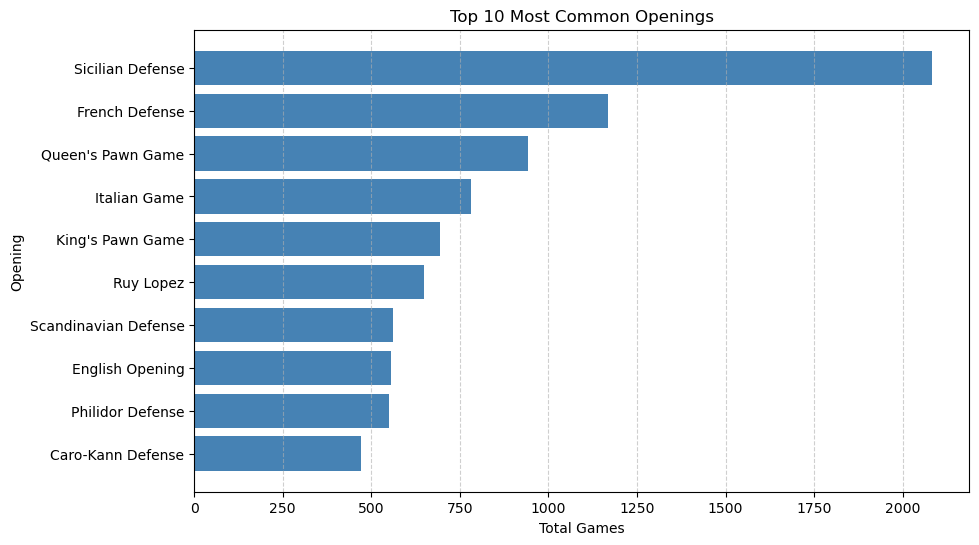

In [120]:
# Select the top 10 most common openings
top_common = win_rates.sort_values(by='total_games', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))  
plt.barh(top_common['opening_main'], top_common['total_games'], color= overall_color)
plt.xlabel('Total Games')
plt.ylabel('Opening')
plt.title('Top 10 Most Common Openings')
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.savefig("images/top_10_common_openings.png", dpi=300, bbox_inches='tight')
plt.show()

#### Now that we have the most common openings, lets look at the openings with the highest winrates for black and white. Since there are some openings that only have a couple games so lets only look at the openings that have been played at least 200 times 

In [121]:
# Filter out openings with fewer than 200 total games
filtered = win_rates[win_rates['total_games'] >= 200]

# Create 2 seperate datasets with Black and White winrates 
filtered_white = filtered.sort_values(by='White Win %', ascending=False)
filtered_black = filtered.sort_values(by='Black Win %', ascending=False)

# Show top 10 openings
print(filtered_black.head(5))
print('\n')
print(filtered_white.head(5))


            opening_main  total_games  white_wins  White Win %  Black Win %
12  Van't Kruijs Opening          278          81        29.14        70.86
15           Indian Game          245          95        38.78        61.22
0       Sicilian Defense         2083         950        45.61        54.39
2      Queen's Pawn Game          943         437        46.34        53.66
6   Scandinavian Defense          560         272        48.57        51.43


              opening_main  total_games  white_wins  White Win %  Black Win %
19  Queen's Gambit Refused          207         128        61.84        38.16
14        Bishop's Opening          259         158        61.00        39.00
8         Philidor Defense          549         315        57.38        42.62
16       Zukertort Opening          233         131        56.22        43.78
7          English Opening          555         310        55.86        44.14


#### Now create some charts that visualize which winrates are the best for each piece color

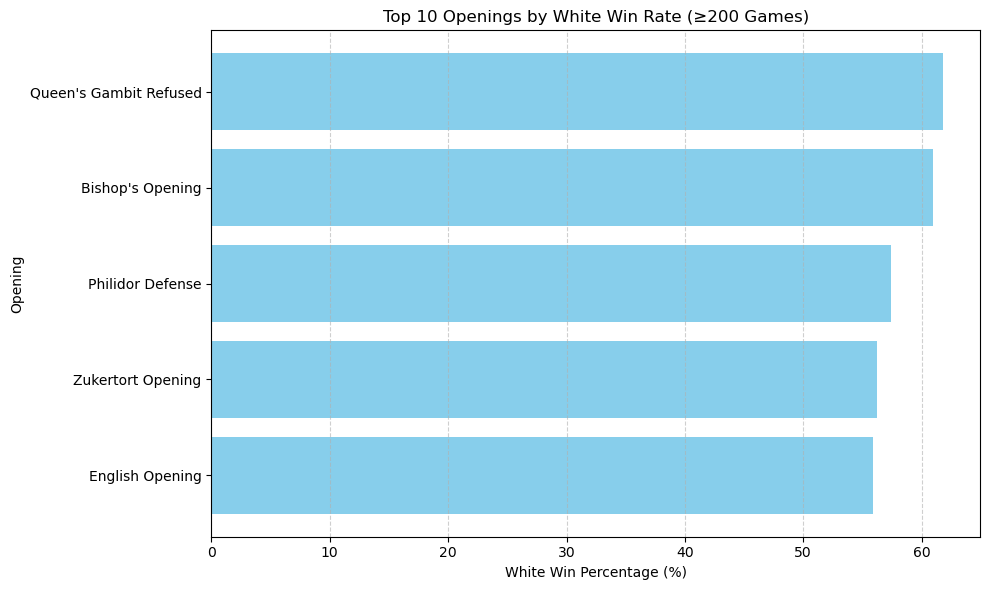

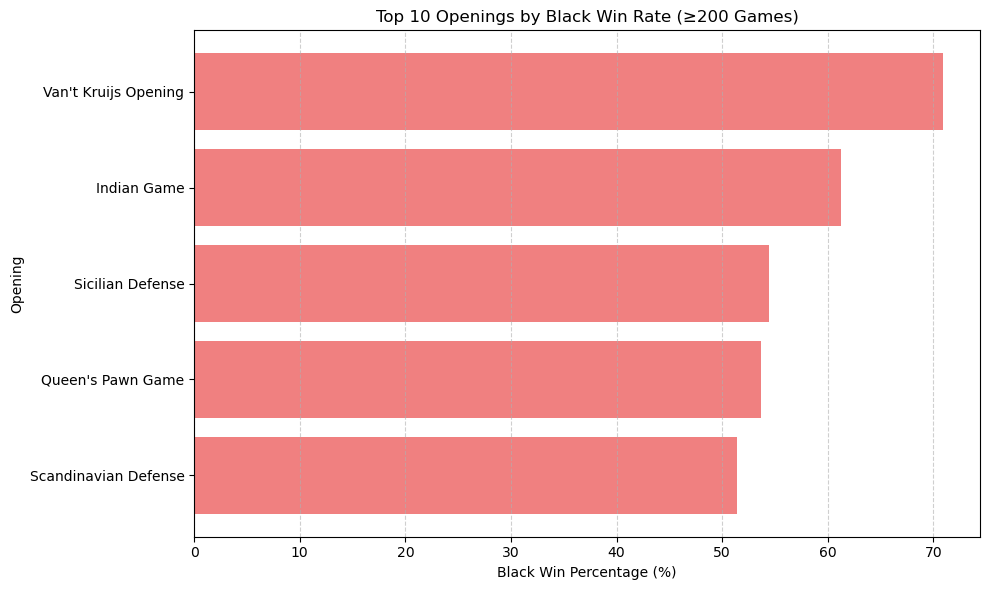

In [122]:
# Select the top 5 openings to visualize
top_openings_white = filtered_white.head(5)
top_openings_black = filtered_black.head(5)


# Plot White
plt.figure(figsize=(10, 6))
plt.barh(top_openings_white['opening_main'], top_openings_white['White Win %'], color= white_color)
plt.xlabel('White Win Percentage (%)')
plt.ylabel('Opening')
plt.title(f'Top {top_n} Openings by White Win Rate (≥200 Games)')
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("images/top_white_openings.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot Black
plt.figure(figsize=(10, 6))
plt.barh(top_openings_black['opening_main'], top_openings_black['Black Win %'], color= black_color)
plt.xlabel('Black Win Percentage (%)')
plt.ylabel('Opening')
plt.title(f'Top {top_n} Openings by Black Win Rate (≥200 Games)')
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("images/top_black_openings.png", dpi=300, bbox_inches='tight')
plt.show()

### We can also look at the most common first moves, instead of just the most common openings

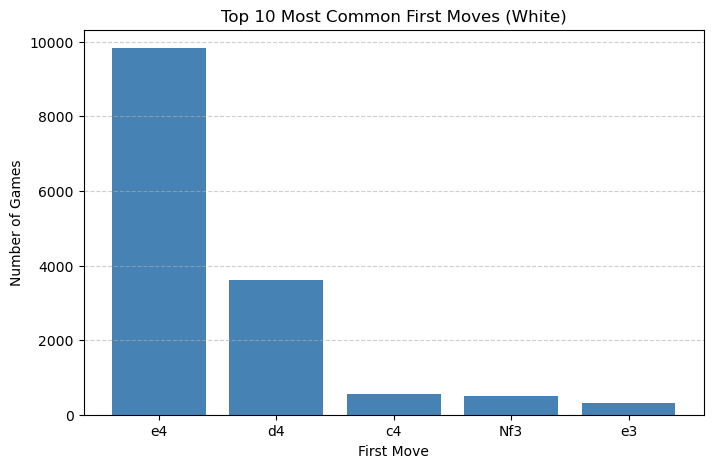

In [123]:
# Count how often each first move appears
df['first_move'] = df['moves'].str.split().str[0]
first_move_counts = df['first_move'].value_counts().head(5)  

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(first_move_counts.index, first_move_counts.values, color= overall_color)
plt.xlabel('First Move')
plt.ylabel('Number of Games')
plt.title('Top 10 Most Common First Moves (White)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("images/top_first_moves.png", dpi=300, bbox_inches='tight')
plt.show()

#### One of the main goals for this notebook was to look at how certain tendencies in the opening change throughout the rating ladder. The next steps are going to be the most difficult as we are going to look at all the previous data, but for the different rating groups that we have.

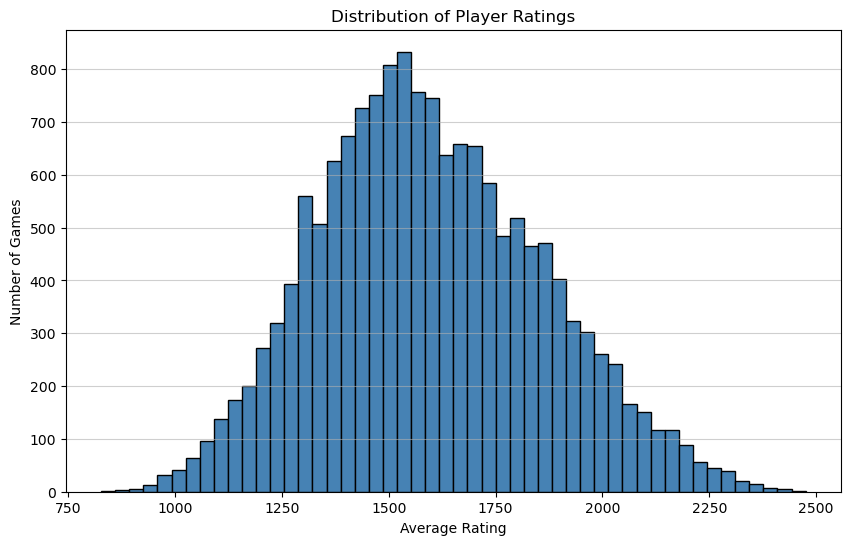

In [124]:
# Create 2 new columns to include a rating difference and an average difference 
df['rating_diff'] = df['white_rating'] - df['black_rating']
df['rating_avg'] = (df['white_rating'] + df['black_rating']) / 2

# Visualize what the spread of ratings is in the data
plt.figure(figsize=(10,6))
plt.hist(df['rating_avg'], bins=50, color= overall_color, edgecolor='black')
plt.title('Distribution of Player Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Games')
plt.grid(axis='y', alpha=0.6)
plt.savefig("images/rating_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

#### Based on the spread of the data we will break up the data into 4 different categories from 1000-1400, 1401-1800, 1801-2200, and 2200+

In [125]:
#Set games into different bins by the rating level
bins = [1000, 1400, 1800, 2200, df['rating_avg'].max()]
labels = ['Lower', 'Intermediate', 'Advanced', 'Expert']

#Add a column to the dataframe that includes the rating group the game is in 
df['rating_group'] = pd.cut(df['rating_avg'], bins=bins, labels=labels, right=False)

#See how many games are in each rating.
df['rating_group'].value_counts()

rating_group
Intermediate    8329
Lower           3624
Advanced        3351
Expert           211
Name: count, dtype: int64

#### Here we have to make another dataset win_rates_by_group. This is very similar to win_rates but we are grouping by rating also so we can get 4 different datasets for each rating group

In [126]:
# Create new dataset by rating group and opening
win_rates_by_group = (
    df.groupby(['rating_group', 'opening_main'], observed=True)
    .agg(
        # Include total games and white wins columns
        total_games=('winner', 'count'),
        white_wins=('winner', lambda x: (x == 'white').sum())
    )
    .reset_index()
)

# Compute white win percentage and black win percentage and add it to 
win_rates_by_group['White Win %'] = (
    win_rates_by_group['white_wins'] / win_rates_by_group['total_games'] * 100
)
win_rates_by_group['Black Win %'] = 100 - win_rates_by_group['White Win %']

# Create a dictionary that stores a dataset for each rating group 
group_dfs = {}
for group, data in win_rates_by_group.groupby('rating_group', observed=True):
    group_dfs[group] = data

#### Now that we have a seperate table for each rating group we can start to look at the differences between players of these groups. First we will start with the most common openings for each rating group

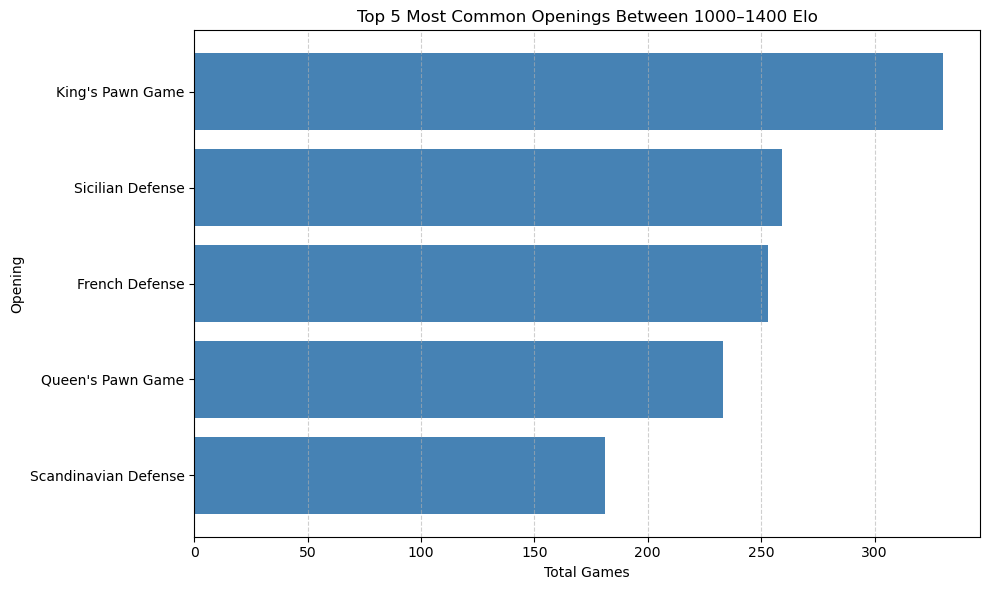

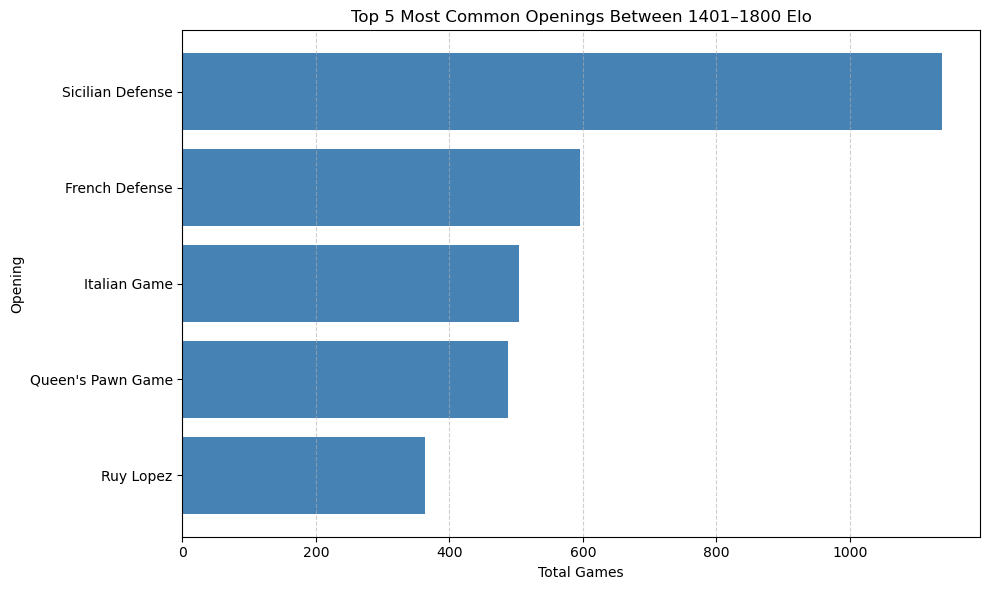

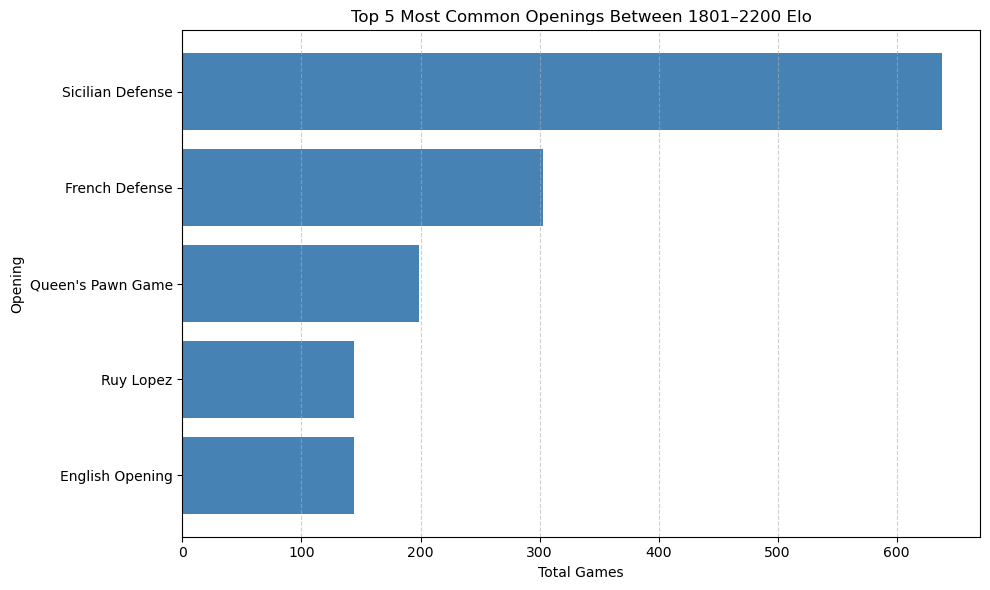

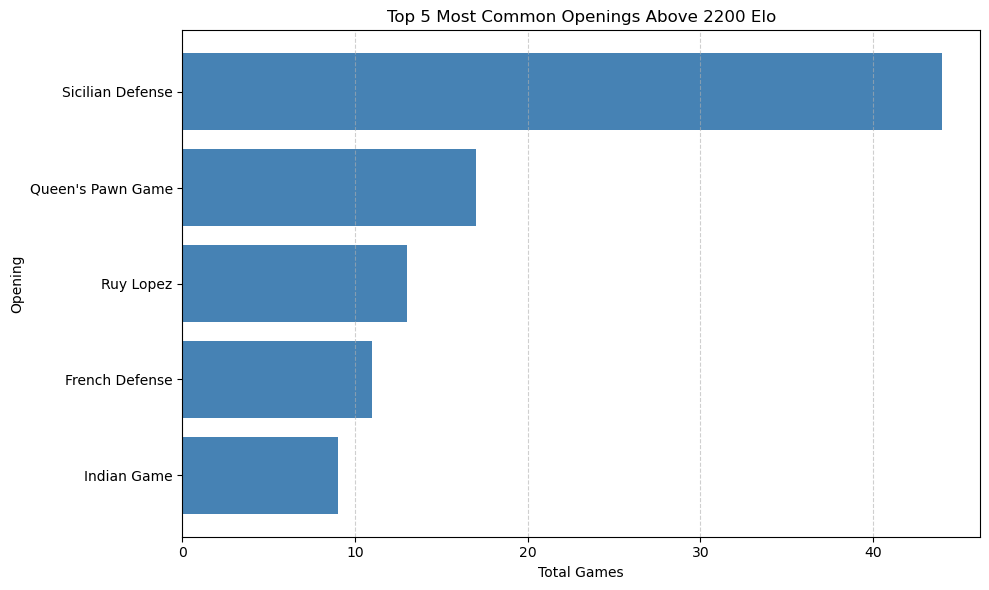

In [127]:
# Create titles for our plots 
titles = {
    'Lower': 'Top 5 Most Common Openings Between 1000–1400 Elo',
    'Intermediate': 'Top 5 Most Common Openings Between 1401–1800 Elo',
    'Advanced': 'Top 5 Most Common Openings Between 1801–2200 Elo',
    'Expert': 'Top 5 Most Common Openings Above 2200 Elo'
}

# Loop through each group in the dictionary
for group_name, group_data in group_dfs.items():
    # Sort by total games and take the top 5
    top_common = group_data.sort_values(by='total_games', ascending=False).head(5)

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(top_common['opening_main'], top_common['total_games'], color= overall_color)
    plt.xlabel('Total Games')
    plt.ylabel('Opening')
    plt.title(titles.get(group_name))
    plt.gca().invert_yaxis()  
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    # Create a filename so we can save a seperate plot each loop
    filename = f"images/top_5_common_openings_{group_name}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

#### Again, we can also look at which openings have the highest win rates for both pieces  

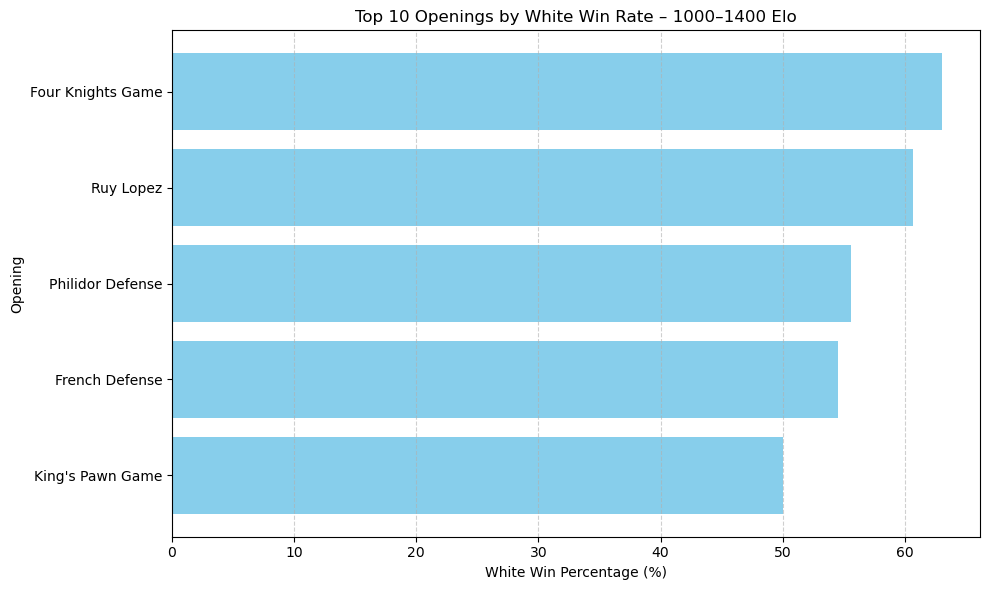

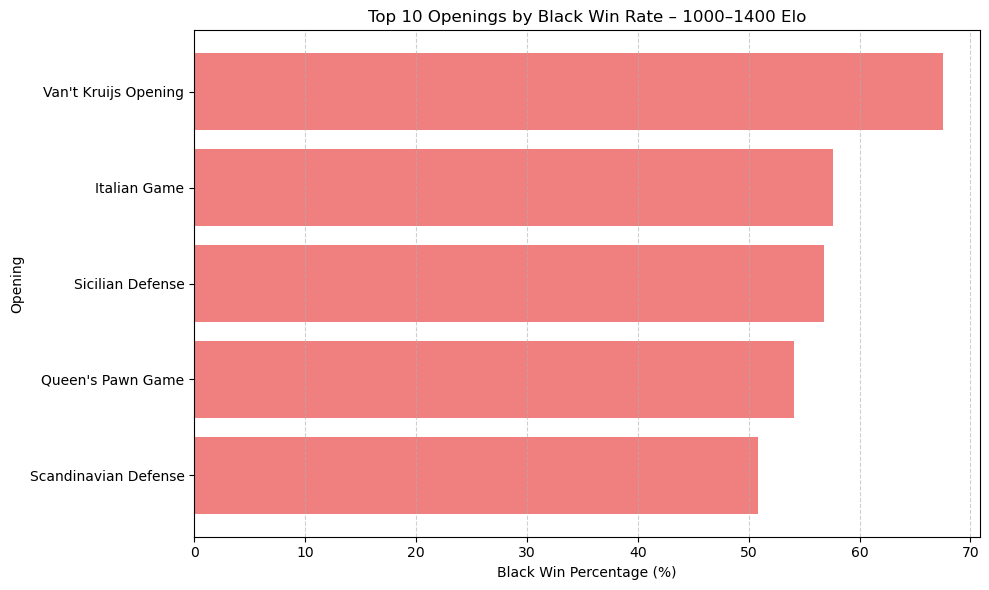

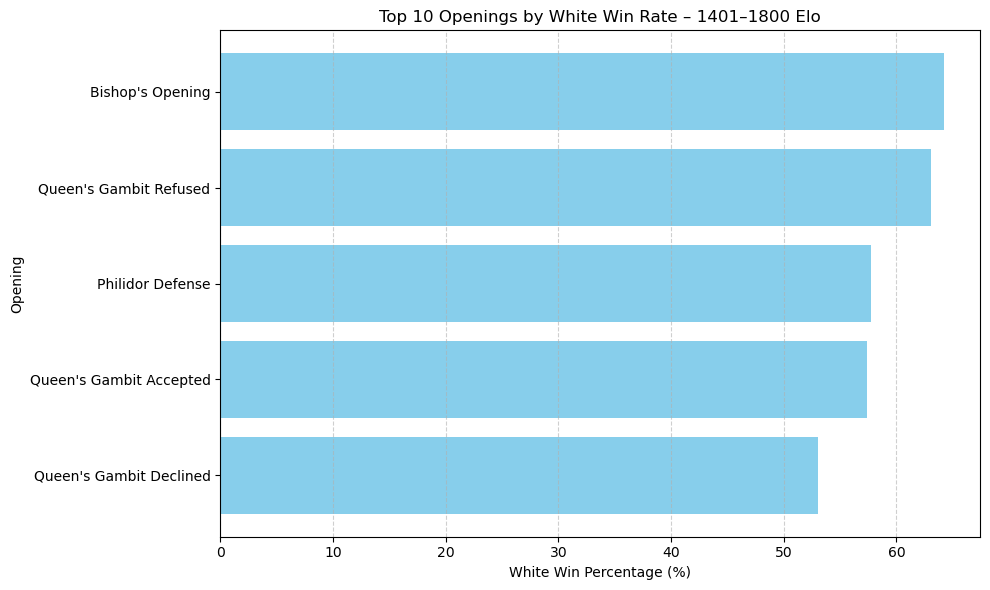

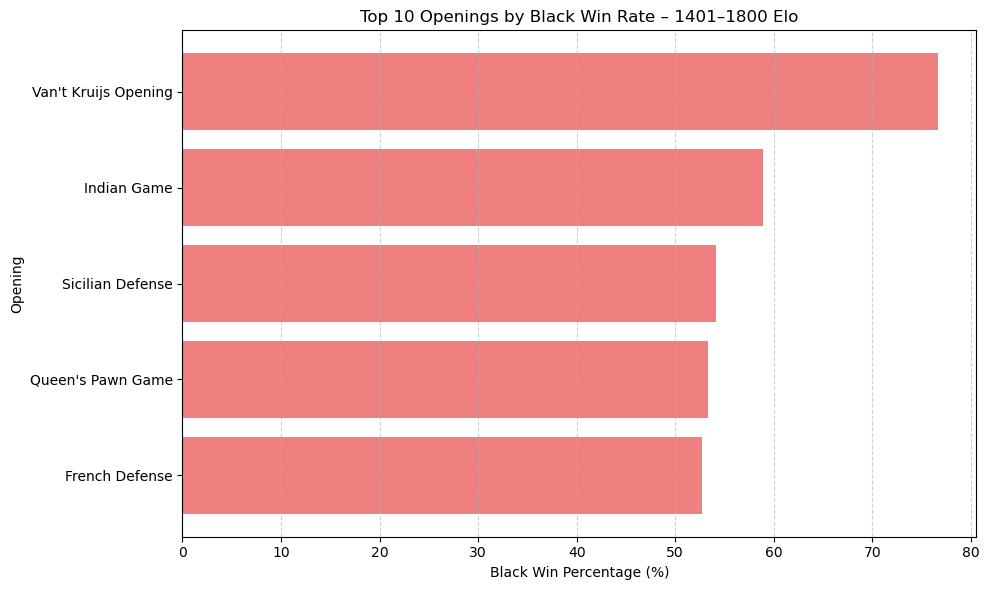

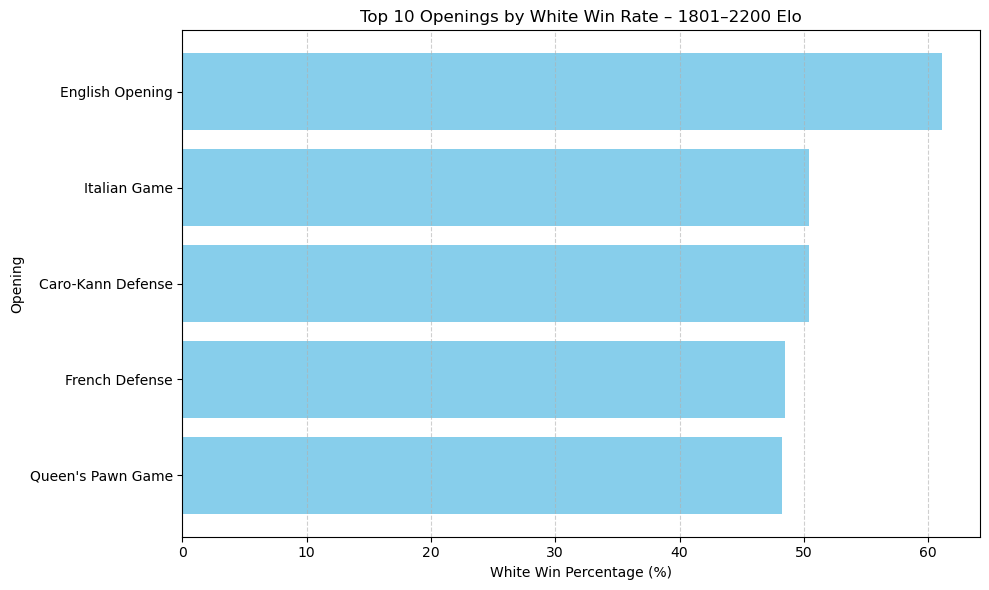

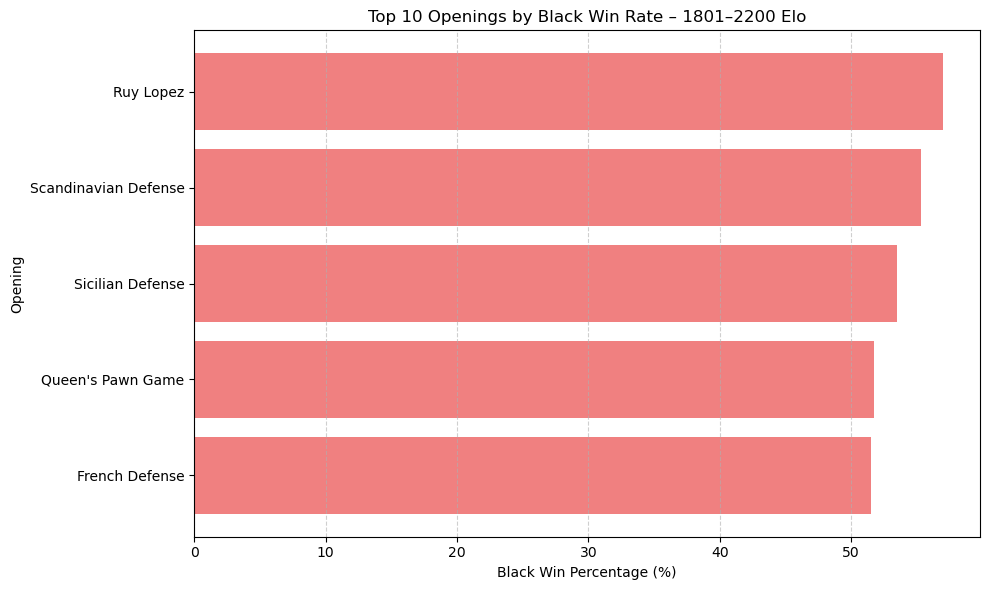

In [128]:
# Again, we will only consider openings that have been played at least 100 times
min_games = 100

# Create titles for our plots 
titles = {
    'Lower': '1000–1400 Elo',
    'Intermediate': '1401–1800 Elo',
    'Advanced': '1801–2200 Elo',
    'Expert': '2200+ Elo'
}

# Loop through each group
for group_name, group_df in group_dfs.items():
    # Filter for openings with enough total games
    filtered = group_df[group_df['total_games'] >= min_games]

    # If there are not any openings with enough games disregard them 
    if filtered.empty:
        continue 
    
    # Sort separately by win rate for white and black
    top_white = filtered.sort_values(by='White Win %', ascending=False).head(5)
    top_black = filtered.sort_values(by='Black Win %', ascending=False).head(5)

    # Plot White
    plt.figure(figsize=(10, 6))
    plt.barh(top_white['opening_main'], top_white['White Win %'], color= white_color)
    plt.xlabel('White Win Percentage (%)')
    plt.ylabel('Opening')
    plt.title(f'Top {top_n} Openings by White Win Rate – {titles.get(group_name)}')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(f"images/{group_name}_top_openings_white.png", dpi=300, bbox_inches='tight')
    plt.show()

    # Plot Black
    plt.figure(figsize=(10, 6))
    plt.barh(top_black['opening_main'], top_black['Black Win %'], color= black_color)
    plt.xlabel('Black Win Percentage (%)')
    plt.ylabel('Opening')
    plt.title(f'Top {top_n} Openings by Black Win Rate – {titles.get(group_name)}')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(f"images/{group_name}_top_openings_black.png", dpi=300, bbox_inches='tight')
    plt.show()

#### The final thing we can do is look at a couple of other trends across rating. First we can look at the average number of moves a game has. It can be expected that higher rated games will last longer due to less blunders in the opening, and more precise play. 

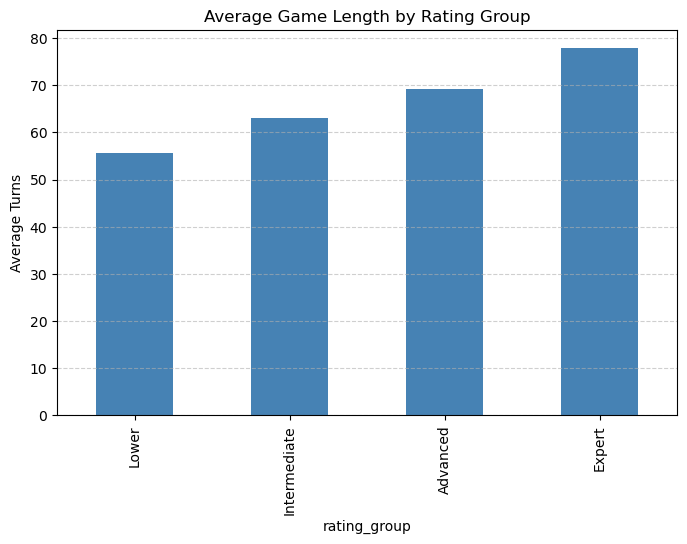

In [129]:
# Make a dataset that has the rating group and the average number of turns in it 
avg_turns = df.groupby('rating_group', observed=True)['turns'].mean()

# Plot the bar chart 
avg_turns.plot(kind='bar', figsize=(8,5), color = overall_color)
plt.ylabel("Average Turns")
plt.title("Average Game Length by Rating Group")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("images/avg_game_length_by_rating_group.png", dpi=300, bbox_inches='tight')
plt.show()

#### The next trend we can look at is the popularity of the Sicilian Defense. This is considered the sharpest and most complex opening in chess, and tends to be played a lot more at the master level than the beginner level. 

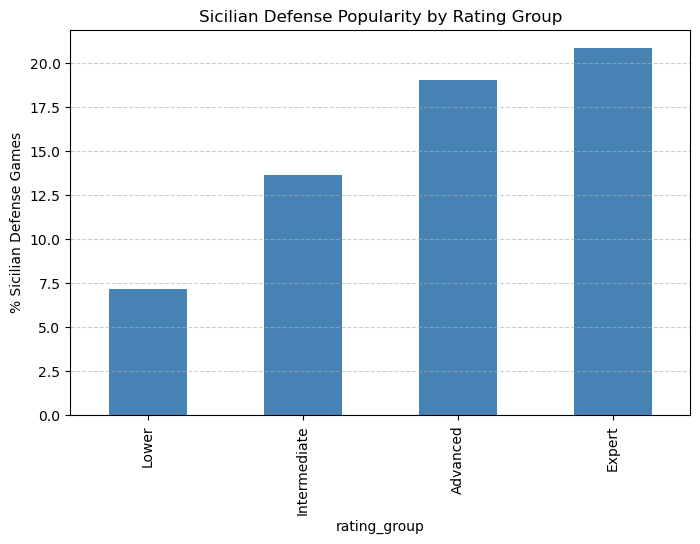

In [130]:
# Find the rate at which the Sicilian Defense is played. 
# We cannot use the raw number of games since each rating group varies in total games played 
sicilian_rate = (
    (df['opening_main'] == "Sicilian Defense")
    .groupby(df['rating_group'], observed=True)
    .mean() * 100
)

# Plot the bar chart 
sicilian_rate.plot(kind='bar', figsize=(8,5), color = overall_color)
plt.ylabel("% Sicilian Defense Games")
plt.title("Sicilian Defense Popularity by Rating Group")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("images/sicilian_defense_rate_by_rating_group.png", dpi=300, bbox_inches='tight')
plt.show()

#### The final trend we can look at across ratings is the percent of games that end in a draw. It is known that higher rated games end in draws more oftern due to players theoretical knowledge and defensive resilience.

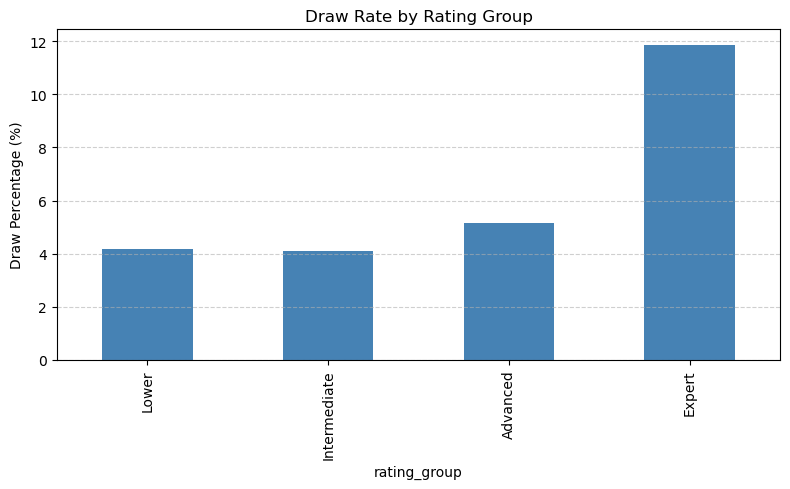

In [131]:
# Calculate the draw rate for each rating group
draw_rate = (
    (df['winner'] == 'draw')
    .groupby(df['rating_group'], observed=True)
    .mean() * 100
)

# Plot the bar chart 
draw_rate.plot(kind='bar', figsize=(8,5), color = overall_color)
plt.ylabel("Draw Percentage (%)")
plt.title("Draw Rate by Rating Group")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("images/draw_rate_by_rating_group.png", dpi=300, bbox_inches='tight')
plt.show()